In [5]:
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Upload the dataset
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('menu.csv')

# Display the first few rows of the dataset to get an overview
data.head()


Saving menu.csv to menu (1).csv


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [6]:
# Select relevant columns
selected_columns = ['Calories', 'Total Fat', 'Carbohydrates']
selected_data = data[selected_columns]

# Display statistics of the selected columns
selected_data.describe()

,Calories,Total Fat,Carbohydrates
count,260.000000,260.000000,260.000000
mean,368.269231,14.165385,47.346154
std,240.269886,14.205998,28.252232
min,0.000000,0.000000,0.000000
25%,210.000000,2.375000,30.000000
50%,340.000000,11.000000,44.000000
75%,500.000000,22.250000,60.000000
max,1880.000000,118.000000,141.000000


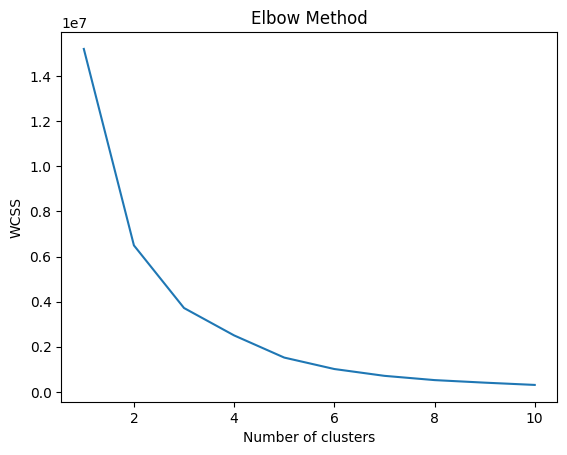

In [7]:
# Use the Elbow Method to find the optimal k
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


In [8]:
# Let's say we choose k=3 based on the Elbow Method
k_value = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(selected_data)

# Display the cluster assignments
data[['Category', 'Item', 'Cluster']]


,Category,Item,Cluster
0,Breakfast,Egg McMuffin,0
1,Breakfast,Egg White Delight,0
2,Breakfast,Sausage McMuffin,2
3,Breakfast,Sausage McMuffin with Egg,2
4,Breakfast,Sausage McMuffin with Egg Whites,2
...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),2
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),1
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),2
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),1
